In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [13]:
# 한글 폰트 깨짐 해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
data = pd.read_csv("../data/서울시_혼잡도_202212.csv", encoding='cp949')

# 불필요한 컬럼 제거(연변, 역번호)
data = data.loc[:,~data.columns.isin(["연번", "역번호"])]

# 평일과 공휴일로 데이터 구분
data_week = data[data["요일구분"] == "평일"]
data_holiday = data[(data["요일구분"] == "공휴일") | (data["요일구분"] == "토요일")]

In [3]:
data_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 551
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요일구분    552 non-null    object 
 1   호선      552 non-null    int64  
 2   출발역     552 non-null    object 
 3   상하구분    552 non-null    object 
 4   5시30분   552 non-null    float64
 5   6시00분   552 non-null    float64
 6   6시30분   552 non-null    float64
 7   7시00분   552 non-null    float64
 8   7시30분   552 non-null    float64
 9   8시00분   552 non-null    float64
 10  8시30분   552 non-null    float64
 11  9시00분   552 non-null    float64
 12  9시30분   552 non-null    float64
 13  10시00분  552 non-null    float64
 14  10시30분  552 non-null    float64
 15  11시00분  552 non-null    float64
 16  11시30분  552 non-null    float64
 17  12시00분  552 non-null    float64
 18  12시30분  552 non-null    float64
 19  13시00분  552 non-null    float64
 20  13시30분  552 non-null    float64
 21  14시00분  552 non-null    float64
 22  14

In [4]:
# 6시에 없는 역은 모든 시간에 데이터가 없음 -> 삭제
data_holiday = data_holiday.drop(data[data["6시00분"].isna()].index)

# 추가로 23시 30분에도 없는 역 존재 -> 삭제
data_holiday = data_holiday.drop(data_holiday[data_holiday["23시30분"].isna()].index)


# 5시 30분, 00시 00분, 00시 30분은 대다수 없고, 다른 시간으로 분석해도 충분히 값이 나올거라 생각 -> 열 자체를 삭제
data_holiday = data_holiday.drop(["5시30분", "00시00분", "00시30분"], axis = 1)


In [6]:
data_week.head()

,요일구분,호선,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,평일,1,서울역,상선,7.3,18.1,18.1,30.9,56.6,69.1,...,15.6,17.1,17.7,14.9,13.7,17.2,10.4,8.8,8.8,1.2
1,평일,1,서울역,하선,11.5,11.0,13.2,21.4,38.0,38.7,...,35.3,36.1,35.0,29.4,39.2,26.1,17.1,11.8,8.5,0.0
2,평일,1,시청,상선,6.6,15.4,14.7,25.0,42.4,55.0,...,19.1,20.7,21.8,17.5,18.5,18.4,14.9,11.5,7.0,2.8
3,평일,1,시청,하선,9.0,9.1,14.6,20.0,35.4,35.7,...,30.5,32.4,31.1,28.5,30.2,22.2,15.4,10.1,6.5,0.8
4,평일,1,종각,상선,6.3,14.4,10.7,17.6,26.7,36.0,...,26.8,25.2,29.7,22.6,26.1,24.0,19.7,14.6,9.6,4.2


In [7]:
data_week = data_week.loc[:,~data_week.columns.isin(["상하구분"])]
data_holiday = data_holiday.loc[:,~data_holiday.columns.isin(["상하구분"])]


# 상하선, 내외선 결합(평균)
data_week = data_week.groupby(["요일구분", "호선","출발역"]).agg("mean")
data_week = data_week.reset_index()

data_holiday = data_holiday.groupby(["요일구분", "호선","출발역"]).agg("mean")
data_holiday = data_holiday.reset_index()

In [8]:
# 공휴일의 경우, 토요일과 공휴일 결합
data_holiday = data_holiday.loc[:,~data_holiday.columns.isin(["요일구분"])]
data_holiday = data_holiday.groupby(["호선", "출발역"]).agg("mean")
data_holiday = data_holiday.reset_index()
data_holiday.head()

,호선,출발역,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,동대문,9.475,8.850,9.800,12.450,14.800,17.850,20.250,23.975,...,21.25,20.975,18.150,17.425,18.425,20.175,16.875,14.075,12.350,13.125
1,1,동묘앞,9.350,8.800,8.850,12.625,14.525,17.025,19.525,22.750,...,19.50,19.825,17.225,14.700,17.275,18.350,14.925,12.050,11.150,11.675
2,1,서울역,10.125,9.375,8.900,9.500,16.400,16.575,19.500,24.275,...,28.05,24.250,27.850,21.000,24.925,22.850,19.450,18.050,14.750,8.650
3,1,시청,8.200,9.400,8.825,9.600,13.650,15.325,18.050,23.275,...,26.65,23.750,26.200,20.950,22.150,21.250,18.925,16.250,13.275,11.800
4,1,신설동,11.925,8.725,9.350,11.300,16.725,16.700,19.050,21.100,...,18.35,18.800,20.275,13.950,15.775,16.825,19.225,13.025,9.525,11.100


In [9]:
# 불필요한 컬럼 제거(요일구분)
data_week = data_week.loc[:,~data_week.columns.isin(["요일구분"])]

# 소수점 통일
data_week = round(data_week, 2)
data_holiday = round(data_holiday, 2)

Text(0, 0.5, '혼잡도')

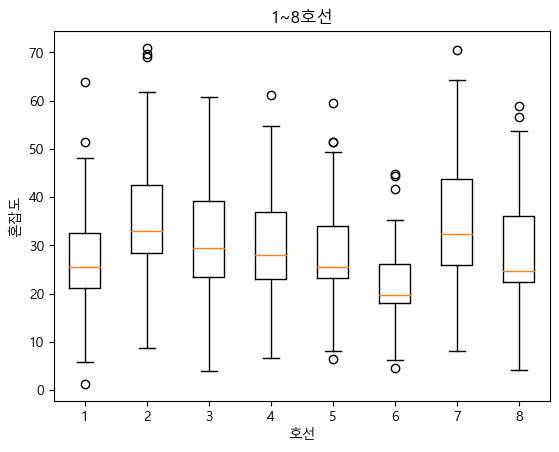

In [14]:
d = data_week.loc[:,~data_week.columns.isin(["출발역"])].groupby("호선").mean()
plt.boxplot(d.T)
plt.title("1~8호선")
plt.xlabel('호선')
plt.ylabel('혼잡도')

In [15]:
# 총 지하철역(평일)
len(set(data_week.출발역))

239

In [16]:
# 호선별 지하철역(평일)
l = [len(set(data_week[data_week.호선 == i].출발역)) for i in range(1, 9)]
[print("{}호선 : {}개".format(i, l[i-1])) for i in range(1, 9)]

1호선 : 10개
2호선 : 51개
3호선 : 34개
4호선 : 26개
5호선 : 56개
6호선 : 39개
7호선 : 42개
8호선 : 18개


[None, None, None, None, None, None, None, None]

In [17]:
data_week = data_week.rename(columns = {"출발역" : "역명"})
data_holiday = data_holiday.rename(columns = {"출발역" : "역명"})

In [18]:
# 역명 뒤에 역으로 끝나지 않으면 "역" 붙이기, 괄호로 표현된 부분은 삭제
def preprocess_station_name(station_name):
    station_name = re.sub(r'\([^)]*\)', '', station_name)
    
    if not station_name.endswith('역'):
        station_name += '역'
    
    return station_name

data_week['역명'] = data_week['역명'].apply(preprocess_station_name)
data_holiday['역명'] = data_holiday['역명'].apply(preprocess_station_name)

In [16]:
# 총신대입구역 -> 이수역
data_week.역명 = ["이수역" if i == "총신대입구역" else i for i in data_week.역명 ]
data_holiday.역명 = ["이수역" if i == "총신대입구역" else i for i in data_holiday.역명 ]

## 시각화

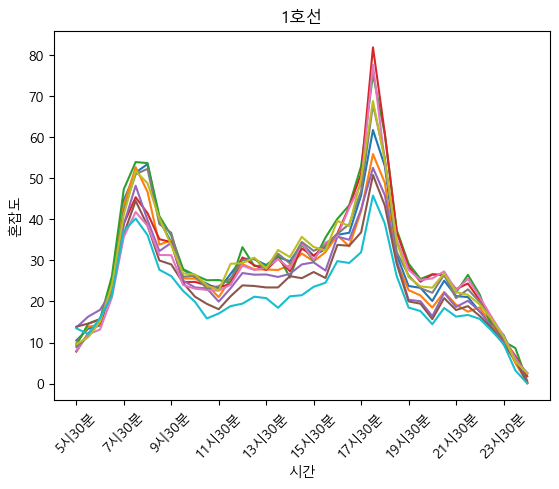

In [19]:
# 각 호선에 따른 시간별 혼잡도 (꺾은선 그래프)
k=1 # 호선
line_1 = data_week[data_week["호선"] == k]
line_1.index = line_1.역명
line_1 = line_1.drop(["호선", "역명"], axis = 1)
xs = line_1.columns
xlabels = line_1.columns

plt.plot(line_1.T)
plt.xticks(ticks=xs, labels=xlabels, rotation=45)
plt.title("{}호선".format(k))
plt.xlabel('시간')
plt.ylabel('혼잡도')
plt.locator_params(axis='x', nbins=len(xlabels)/4)

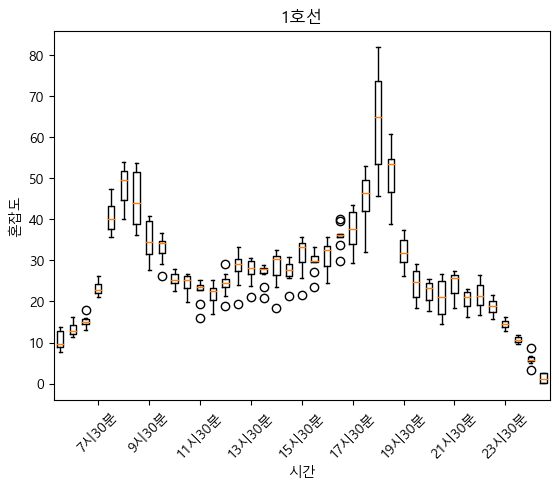

In [20]:
# 각 호선별 따른 시간별 혼잡도 (box plot)
k=1 # 호선
line_1 = data_week[data_week["호선"] == k]
line_1.index = line_1.역명
line_1 = line_1.drop(["호선", "역명"], axis = 1)
xs = line_1.columns
xlabels = line_1.columns

plt.boxplot(line_1)
xs = list(range(len(line_1.columns)))
xlabels = line_1.columns
plt.xticks(ticks=xs, labels=xlabels, rotation=45)
plt.title("{}호선".format(k))
plt.xlabel('시간')
plt.ylabel('혼잡도')
plt.locator_params(axis='x', nbins=len(xlabels)/4)

In [22]:
line_1 = line_1.reset_index()

In [23]:
line_1 = line_1.melt(id_vars = "역명", var_name = "시간", value_name = "혼잡도")

In [31]:
from pyecharts.charts import Bar, Timeline
from pyecharts.globals import ThemeType
from pyecharts import options as opts



tl = Timeline(init_opts=opts.InitOpts(theme=ThemeType.WHITE)).add_schema(is_auto_play=True)
for t in line_1["역명"].unique():
    tl.add((Bar(init_opts = opts.InitOpts(theme = ThemeType.WHITE))
            .add_xaxis(line_1["시간"].unique().tolist())
            .add_yaxis('혼잡도', line_1[line_1["역명"] == t]["혼잡도"].tolist(), color = "blue", gap = "0%")
            .set_global_opts(title_opts=opts.TitleOpts(title="1호선", subtitle = "{}".format(t)),
                              yaxis_opts=opts.AxisOpts(max_=200))
           .set_series_opts(label_opts=opts.LabelOpts(is_show=False))),"{}".format(t))

tl.render_notebook() # JupyterLab에선 불가

In [32]:
data_week = data_week.loc[:,~data_week.columns.isin(["호선"])] 
data_week = data_week.groupby("역명").agg(max).reset_index()

In [33]:
data_holiday = data_holiday.loc[:,~data_holiday.columns.isin(["호선"])] 
data_holiday = data_holiday.groupby("역명").agg(max).reset_index()

In [34]:
data_week.to_csv("../data/Seoul_Congestion_week_2022.csv", encoding='cp949')
data_holiday.to_csv("../data/Seoul_Congestion_holiday_2022.csv", encoding='cp949')

In [36]:
data_week.head()

,역명,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,가락시장역,24.25,29.95,39.65,52.90,77.95,99.2,95.75,77.10,64.45,...,42.80,45.05,48.55,44.3,46.15,38.00,28.45,21.35,10.50,6.75
1,가산디지털단지역,41.25,31.00,37.40,49.75,64.40,66.6,51.55,41.90,34.30,...,38.15,37.75,38.90,36.3,35.15,33.30,31.45,18.75,10.30,10.50
2,강남구청역,19.35,35.50,30.25,42.25,58.45,70.7,54.20,50.40,52.55,...,45.30,42.45,48.75,45.5,49.90,37.75,26.40,23.40,11.90,11.25
3,강남역,39.45,23.55,29.25,38.70,54.95,73.9,79.85,68.10,57.00,...,48.55,48.45,61.25,68.8,65.30,39.75,36.85,20.55,19.45,11.00
4,강동구청역,19.60,28.05,36.55,46.30,61.20,81.2,66.60,62.05,45.50,...,31.95,32.10,32.75,30.9,35.40,25.55,22.05,16.05,8.65,5.65


In [37]:
data_holiday.head()

,역명,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,가락시장역,15.55,14.02,16.52,18.60,26.22,29.50,33.85,37.90,38.35,...,39.85,33.52,32.83,35.50,39.35,33.75,34.72,29.42,23.10,16.52
1,가산디지털단지역,17.05,15.88,13.72,16.42,23.10,25.48,29.28,31.42,30.35,...,29.75,27.80,25.40,25.00,25.08,27.42,23.50,22.80,22.40,12.20
2,강남구청역,21.22,16.65,17.77,21.10,24.92,27.92,33.35,33.60,31.12,...,37.60,32.20,31.75,34.75,32.45,30.55,30.72,27.40,24.15,16.55
3,강남역,14.48,13.10,13.38,15.52,20.95,26.65,31.90,31.15,35.95,...,39.60,32.50,35.85,41.15,41.38,41.15,41.80,34.85,31.58,21.18
4,강동구청역,13.55,12.10,14.63,14.63,22.22,23.20,30.90,31.85,28.95,...,28.17,25.08,23.20,24.48,25.67,25.25,26.02,18.30,14.55,11.70
